### <p style="text-align: right;"> Hailey Reese, Jacob Schmidt, Jennifer Abel, Hayden Weiss, Noah Jankowski
</p>

In [55]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.linalg
from sklearn.decomposition import PCA
import seaborn as sns; sns.set(style="white", color_codes=True)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [56]:
# PCA analysis
B1G_14_15_H = pd.read_csv('B1G Data.csv')
B1G_14_15_H.columns

B1G_18_19 = B1G_14_15_H[B1G_14_15_H['Year'] == '2018-2019']

pca = PCA()

pca_data_18_19 = pca.fit_transform(B1G_18_19.iloc[:,3:50])

print("Variance For Each University in the Big 10")
print("")
for i in range(len(B1G_18_19['School'])):
    print(B1G_18_19['School'].iloc[i]+":",np.round(pca.explained_variance_,3)[i])

Variance For Each University in the Big 10

Michigan State: 21421.582
Purdue: 15081.201
Michigan: 7283.76
Wisconsin: 4493.635
Maryland: 2673.587
Iowa: 2475.809
Minnesota: 1161.886
Ohio State: 969.418
Indiana: 576.151
Penn State: 459.435
Illinois: 309.996
Rutgers: 198.286
Nebraska: 115.061
Northwestern: 0.0


//anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      W   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     12.87
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           0.000623
Time:                        11:01:48   Log-Likelihood:                 15.574
No. Observations:                  70   AIC:                            -27.15
Df Residuals:                      68   BIC:                            -22.65
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4625      0.269      5.431      0.000       0.925       2.000
FG-O          -0.0021      0.001     -3.588      0.001      -0.003      -0.001
==============================================================================
Omnibus:                        3.003   Durbin-Watson:                   0.999
Prob(Omnibus):                  0.223   Jarque-Bera (JB):                1.871
Skew:                          -0.158   Prob(JB):                        0.392
Kurtosis:                       2.264   Cond. No.                     5.22e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

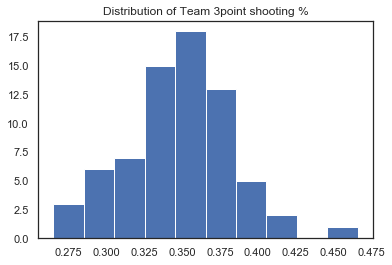

In [57]:
# OLS and relationship analysis 
data = pd.read_csv('B1G Data.csv')
data_2014_15 = data[data['Year'] == '2014-2015'].drop(['L', 'School', 'Year', 'MP', 'Seed', 'Finish', 'G'], 1)
data_2015_16 = data[data['Year'] == '2015-2016'].drop(['L', 'School', 'Year', 'MP', 'Seed', 'Finish', 'G'], 1)
data_2016_17 = data[data['Year'] == '2016-2017'].drop(['L', 'School', 'Year', 'MP', 'Seed', 'Finish', 'G'], 1)
data_2017_18 = data[data['Year'] == '2017-2018'].drop(['L', 'School', 'Year', 'MP', 'Seed', 'Finish', 'G'], 1)
data_2018_19 = data[data['Year'] == '2018-2019'].drop(['L', 'School', 'Year', 'MP', 'Seed', 'Finish', 'G'], 1)
dataa = data.drop(['L', 'School', 'Year', 'MP', 'Seed', 'Finish', 'G'], 1)

ind_variables_2014_15 = [i for i in data_2014_15.columns if i != 'W'] 
ind_variables_2015_16 = [i for i in data_2015_16.columns if i != 'W']
ind_variables_2016_17 = [i for i in data_2016_17.columns if i != 'W']
ind_variables_2017_18 = [i for i in data_2017_18.columns if i != 'W']
ind_variables_2018_19 = [i for i in data_2018_19.columns if i != 'W']
total_var = [i for i in dataa.columns if i != 'W']
plt.hist(data['3P%-T'])
plt.title('Distribution of Team 3point shooting %')

class Variable_relations():
    
    def __init__(self, dataset, independent_var, dependent_var, return_param=False, return_descriptive_stats=False):
        self.dataset = dataset
        self.independent_var = str(independent_var)
        self.dependent_var = str(dependent_var)
        self.return_param = return_param
        self.return_descriptive_stats = return_descriptive_stats
    
    def find_coeff_ols(self):
        '''
        function is designed to take in user chosen dependent, independent variables.
        returns model output using ordinary least squares from the statsmodels api.
        If you only want to view coefficients and constants, change return_param to True. 
        If you want to return descriptive statistics such as mean, std, and the count, set
        return_descriptive_stats to True
        '''
        model_simple = sm.OLS(self.dataset[self.dependent_var], self.dataset[self.independent_var]).fit()
        model = sm.OLS(self.dataset[self.dependent_var], sm.add_constant(self.dataset[self.independent_var])).fit()
        
        if self.return_param:
            return model.params
        
        if self.return_descriptive_stats:
            return self.dataset[self.independent_var].mean(), self.dataset[self.independent_var].std(), self.dataset[self.independent_var].count()
        
        return model.summary()
    
    def visuals(self):
        '''
        Takes in two variables(generally the independent and dependent), and plots a joint plot.
        Kind is set to regression
        '''
        plot = sns.jointplot(x=str(self.independent_var), y=str(self.dependent_var), data=self.dataset, kind='reg')

new = Variable_relations(dataa, 'FG-O', 'W')
new.find_coeff_ols()

PREDICTING BIG TEN TOURNAMENT SEEDS UTILIZING CLASSIFIERS

In [4]:
data = pd.read_csv("B1G Data.csv", delimiter=",")
data.columns

Index(['School', 'Year', 'G', 'MP', 'FG-O', 'FG-T', 'FGA-O', 'FGA-T', 'FG%-O',
       'FG%-T', '2P-O', '2P-T', '2PA-O', '2PA-T', '2P%-O', '2P%-T', '3P-O',
       '3P-T', '3PA-O', '3PA-T', '3P%-O', '3P%-T', 'FT-O', 'FT-T', 'FTA-O',
       'FTA-T', 'FT%-O', 'FT%-T', 'ORB-O', 'ORB-T', 'DRB-O', 'DRB-T', 'TRB-O',
       'TRB-T', 'AST-O', 'AST-T', 'STL-O', 'STL-T', 'BLK-O', 'BLK-T', 'TOV-O',
       'TOV-T', 'PF-O', 'PF-T', 'PTS-O', 'PTS-T', 'PTS/G-O', 'PTS/G-T', 'W',
       'L', 'Seed', 'Finish'],
      dtype='object')

In [5]:
data = data[['School','FG%-O', 'FG%-T', '2P%-O', '2P%-T', '3P%-O', '3P%-T', 'FT%-O', 'FT%-T', "W", "L", "Seed"]]
test = data[56:]
data = data.drop(data.index[56:])
data = data.reindex(np.random.permutation(data.index))
test = test.reindex(np.random.permutation(test.index))
data = data.append(test)

Originally, our idea was to utilzie classifiers to predict the seeds of each team for the 2018-2019 Big 10 Tournament. We utilized the four previous seasons as the training data, and the 2018-2019 season as the testing data. The features of the data would be all the average statistics, this way the features would all be on the same scale. However, this did not work as we had hoped. Classifiers do not take repetition into account, and therefore multiple teams would be assigned the same seed, which as we all know is not how it works. This made our model's accuracy only be 7.14% since it would only get the 1 seed and 14 seed correct.

In [6]:
train_vectors = data.drop(["School", "Seed"], axis=1)
train_vectors = train_vectors.iloc[0:56]
train_labels = data[["Seed"]]
train_labels = train_labels.iloc[0:56]

test_vectors = data.drop(["School", "Seed"], axis=1)
test_vectors = test_vectors.iloc[56:]
test_labels = data[["Seed"]]
test_labels = test_labels.iloc[56:]

In [7]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(train_vectors, train_labels)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
Y_pred = classifier.predict(test_vectors)
print(Y_pred)
print(test_labels)

[ 1  8  1 14 13 12 14  1  1 13  1 14 14 14]
    Seed
60     5
61     6
58     3
68    13
64     9
62     7
67    12
57     2
59     4
63     8
56     1
66    11
69    14
65    10


In [9]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, Y_pred)
correct = cm[0][0] + cm[1][1]

In [10]:
accuracy = correct / len(test_labels)
print("Accuracy of Model: ", accuracy*100, "%")

Accuracy of Model:  7.142857142857142 %


Still wanting to attempt to utilize classifiers to predict the seeds of each team, we then decided to use classifiers to predict if a team would be in the top 7 or bottom 7 seeds. However, the issue with this was that the classifier does not know we want it to be an even top 7 and bottom 7, which is why our accuracy was only 85%, because it had put only 5 teams in the top half and 8 teams in the bottom half.

In [11]:
quantile_list = []
for i in data.index:
    seed = data["Seed"][i]
    if seed == 1 or seed == 2 or seed == 3 or seed == 4 or seed == 5 or seed == 6 or seed == 7:
        quantile = "Top Half"
    else:
        quantile = "Bottom Half"
    quantile_list.append(quantile)
    
data["Quantile"] = quantile_list

In [12]:
train_vectors = data.drop(["School", "Seed", "Quantile"], axis=1)
train_vectors = train_vectors.iloc[0:56]
train_labels = data[["Quantile"]]
train_labels = train_labels.iloc[0:56]

test_vectors = data.drop(["School", "Seed", "Quantile"], axis=1)
test_vectors = test_vectors.iloc[56:]
test_labels = data[["Quantile"]]
test_labels = test_labels.iloc[56:]

In [13]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(train_vectors, train_labels)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
Y_pred = classifier.predict(test_vectors)
print(Y_pred)
print(test_labels)

['Top Half' 'Bottom Half' 'Top Half' 'Bottom Half' 'Bottom Half'
 'Bottom Half' 'Bottom Half' 'Top Half' 'Top Half' 'Bottom Half'
 'Top Half' 'Bottom Half' 'Bottom Half' 'Bottom Half']
       Quantile
60     Top Half
61     Top Half
58     Top Half
68  Bottom Half
64  Bottom Half
62     Top Half
67  Bottom Half
57     Top Half
59     Top Half
63  Bottom Half
56     Top Half
66  Bottom Half
69  Bottom Half
65  Bottom Half


In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, Y_pred)
correct = cm[0][0] + cm[1][1]

In [16]:
accuracy = correct / len(test_labels)
print("Accuracy of Model: ", accuracy*100, "%")

Accuracy of Model:  85.71428571428571 %


The final attempt to utilize the classifiers to assist in predicting seeds was to first use the above model, even though it was not perfect, to predict if a team was in the top or bottom half. Then we would use a team's record to help place them into specific seeds. If two teams had them same record, then we would use another classifier to help distinguish which team would have the better seed. However, when attempting this to distinguish the number 1 and numbers 2 seeds, the classifier just predicted them both to be number 1, and so this approach did not work either.

In [17]:
print(data[56:])

            School  FG%-O  FG%-T  2P%-O  2P%-T  3P%-O  3P%-T  FT%-O  FT%-T  \
60        Maryland  0.391  0.435  0.445  0.478  0.310  0.363  0.714  0.766   
61            Iowa  0.461  0.436  0.547  0.482  0.339  0.358  0.717  0.740   
58        Michigan  0.411  0.439  0.460  0.504  0.292  0.338  0.680  0.737   
68        Nebraska  0.446  0.405  0.484  0.450  0.373  0.322  0.705  0.680   
64         Indiana  0.436  0.418  0.490  0.490  0.343  0.275  0.636  0.679   
62       Minnesota  0.441  0.435  0.495  0.478  0.338  0.326  0.687  0.677   
67         Rutgers  0.441  0.420  0.485  0.467  0.367  0.314  0.705  0.643   
57          Purdue  0.411  0.433  0.469  0.485  0.332  0.363  0.724  0.726   
59       Wisconsin  0.384  0.438  0.424  0.478  0.307  0.359  0.672  0.604   
63      Ohio State  0.435  0.410  0.492  0.471  0.336  0.321  0.737  0.734   
56  Michigan State  0.376  0.479  0.419  0.551  0.305  0.355  0.678  0.771   
66        Illinois  0.469  0.424  0.543  0.471  0.325  0.334  0.

In [18]:
top_two = data[data["Seed"].isin([1,2])]
quantile_list = []
for i in top_two.index:
    seed = top_two["Seed"][i]
    if seed == 1:
        quantile = "Number 1"
    else:
        quantile = "Number 2"
    quantile_list.append(quantile)
    
top_two["Quantile 2"] = np.array(quantile_list)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [19]:
train_vectors = top_two.drop(["School", "Seed", "Quantile", "Quantile 2", "W", "L"], axis=1)
train_vectors = train_vectors.iloc[0:-2]
train_labels = top_two[["Quantile 2"]]
train_labels = train_labels.iloc[0:-2]

test_vectors = top_two.drop(["School", "Seed", "Quantile", "Quantile 2", "W", "L"], axis=1)
test_vectors = test_vectors.iloc[-2:]
test_labels = top_two[["Quantile 2"]]
test_labels = test_labels.iloc[-2:]

In [20]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(train_vectors, train_labels)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
Y_pred = classifier.predict(test_vectors)
print(Y_pred)
print(test_labels)

['Number 1' 'Number 1']
   Quantile 2
57   Number 2
56   Number 1


PREDICTING 2018-2019 BIG TEN TOURNAMENT

In [46]:
data = pd.read_csv("B1G Data.csv", delimiter=",")

In [48]:
new_data = pd.read_csv("CMSE 202 - Sheet1 (1).csv", delimiter=",")

In [49]:
new_data

,Team,AdjO,adjD,adjT,Luck
0,Michigan State,121.0,89.3,72.1,0.018
1,Michigan,114.5,86.2,64.8,-0.001
2,Purdue,122.5,95.6,65.9,-0.015
3,Wisconsin,110.4,88.5,63.9,-0.018
4,Maryland,113.4,94.1,66.0,-0.004
5,Iowa,117.4,101.3,69.5,0.050
6,Indiana,109.1,95.4,66.9,-0.034
7,Illinois,109.1,101.1,70.6,-0.052
8,Ohio State,109.1,94.4,65.8,0.013
9,Penn State,109.4,94.5,67.6,-0.102


In [50]:
my_dict = {}
for i in range(len(new_data["Team"])):
    adjo = new_data["AdjO"][i]
    adjd = new_data["adjD"][i]
    winning_percentage = adjo**11.5 / (adjo**11.5 + adjd**11.5)
    my_dict[new_data["Team"][i]] = winning_percentage
print(my_dict)

{'Michigan State': 0.9705043807363638, 'Michigan': 0.9632049688841307, 'Purdue': 0.9453852959822671, 'Wisconsin': 0.9270840749241518, 'Maryland': 0.895245499910568, 'Iowa': 0.8450450756086427, 'Indiana': 0.8239211047244581, 'Illinois': 0.7059469330933372, 'Ohio State': 0.8408175851638855, 'Penn State': 0.8433974351057613, 'Northwestern': 0.7436100128498285, 'Minnesota': 0.8308675153308951, 'Rutgers': 0.7311825903137232, 'Nebraska': 0.8263883696678633}


In [51]:

def initialize(image_name,schools):
    from PIL import Image, ImageDraw, ImageFont

    # create Image object with the input image

    image = Image.open(image_name)

    # initialise the drawing context with
    # the image object as background

    draw = ImageDraw.Draw(image)
    font = ImageFont.truetype('arial.ttf', size=12)
    Seed = [0]
    for i in range(0,14):
        Seed.append(schools[i])
    # 1 seed
    (x, y) = (268,75)
    message = Seed[1]
    color = 'rgb(0, 0, 0)' # black color
    draw.text((x, y), message, fill=color, font=font)

    # 4 seed
    (x, y) = (268,160)
    message = Seed[4]
    color = 'rgb(0, 0, 0)' # black color
    draw.text((x, y), message, fill=color, font=font)

    # 2 seed
    (x, y) = (268,292)
    message = Seed[2]
    color = 'rgb(0, 0, 0)' # black color
    draw.text((x, y), message, fill=color, font=font)

    # 3 seed
    (x, y) = (268,376)
    message = Seed[3]
    color = 'rgb(0, 0, 0)' # black color
    draw.text((x, y), message, fill=color, font=font)

    # 5 seed
    (x, y) = (160,178)
    message = Seed[5]
    color = 'rgb(0, 0, 0)' # black color
    draw.text((x, y), message, fill=color, font=font)

    # 7 seed
    (x, y) = (160,308)
    message = Seed[7]
    color = 'rgb(0, 0, 0)' # black color
    draw.text((x, y), message, fill=color, font=font)
    # 10 seed
    (x, y) = (160,325)
    message = Seed[10]
    color = 'rgb(0, 0, 0)' # black color
    draw.text((x, y), message, fill=color, font=font)

    # 8 seed
    (x, y) = (160,88)
    message = Seed[8]
    color = 'rgb(0, 0, 0)' # black color
    draw.text((x, y), message, fill=color, font=font)
    # 9 seed
    (x, y) = (160,105)
    message = Seed[9]
    color = 'rgb(0, 0, 0)' # black color
    draw.text((x, y), message, fill=color, font=font)

    # 6 seed
    (x, y) = (160,395)
    message = Seed[6]
    color = 'rgb(0, 0, 0)' # black color
    draw.text((x, y), message, fill=color, font=font)

    # 12 seed
    (x, y) = (52,193)
    message = Seed[12]
    color = 'rgb(0, 0, 0)' # black color
    draw.text((x, y), message, fill=color, font=font)
    # 13 seed
    (x, y) = (52,209)
    message = Seed[13]
    color = 'rgb(0, 0, 0)' # black color
    draw.text((x, y), message, fill=color, font=font)

    # 11 seed
    (x, y) = (52,412)
    message = Seed[11]
    color = 'rgb(0, 0, 0)' # black color
    draw.text((x, y), message, fill=color, font=font)
    # 14 seed
    (x, y) = (52,428)
    message = Seed[14]
    color = 'rgb(0, 0, 0)' # black color
    draw.text((x, y), message, fill=color, font=font)
    image.save('initial_bracket.png')
    return image

In [52]:
schools = data["School"].iloc[56:]

In [53]:
schools = list(schools)
print(schools)

['Michigan State', 'Purdue', 'Michigan', 'Wisconsin', 'Maryland', 'Iowa', 'Minnesota', 'Ohio State', 'Indiana', 'Penn State', 'Illinois', 'Rutgers', 'Nebraska', 'Northwestern']


In [54]:
image = initialize('bracket.png',schools)
image

OSError: cannot open resource

In [30]:
def tournament(image_name,schools):
    import numpy as np
    from PIL import Image, ImageDraw, ImageFont
    image = Image.open(image_name)
    draw = ImageDraw.Draw(image)
    font = ImageFont.truetype('arial.ttf', size=12)
    pick1 = np.random.randint(1,3)
    if pick1 == 1:
        winner1 = schools[11]
    else:
        winner1 = schools[12]
    pick2 = np.random.randint(1,3)
    if pick2 == 1:
        winner2 = schools[10]
    else:
        winner2 = schools[13]
    # 5 seed opponent
    (x, y) = (160,410)
    message = winner2
    color = 'rgb(0, 0, 0)' # black color
    draw.text((x, y), message, fill=color, font=font)

    # 6 seed opponent
    (x, y) = (160,195)
    message = winner1
    color = 'rgb(0, 0, 0)' # black color
    draw.text((x, y), message, fill=color, font=font)
    image.save('first_round_bracket.png')
    
    pick3 = np.random.randint(1,3)
    if pick1 == 1:
        winner3 = schools[7]
    else:
        winner3 = schools[8]
        
    pick4 = np.random.randint(1,3)
    if pick2 == 1:
        winner4 = schools[4]
    else:
        winner4 = winner1
        
    pick5 = np.random.randint(1,3)
    if pick1 == 1:
        winner5 = schools[6]
    else:
        winner5 = schools[9]
        
    pick6 = np.random.randint(1,3)
    if pick2 == 1:
        winner6 = schools[5]
    else:
        winner6 = winner2
        
    # 1 seed opponent
    (x, y) = (268,91)
    message = winner3
    color = 'rgb(0, 0, 0)' # black color
    draw.text((x, y), message, fill=color, font=font)
    
        # 4 seed opponent
    (x, y) = (268,176)
    message = winner4
    color = 'rgb(0, 0, 0)' # black color
    draw.text((x, y), message, fill=color, font=font)

    # 2 seed opponent
    (x, y) = (268,308)
    message = winner5
    color = 'rgb(0, 0, 0)' # black color
    draw.text((x, y), message, fill=color, font=font)

    # 3 seed opponent
    (x, y) = (268,392)
    message = winner6
    color = 'rgb(0, 0, 0)' # black color
    draw.text((x, y), message, fill=color, font=font)
    image.save('second_round_bracket.png')
    
    pick7 = np.random.randint(1,3)
    if pick7 == 1:
        winner7 = schools[0]
    else:
        winner7 = winner3
        
    pick8 = np.random.randint(1,3)
    if pick8 == 1:
        winner8 = schools[3]
    else:
        winner8 = winner4
        
    pick9 = np.random.randint(1,3)
    if pick9 == 1:
        winner9 = schools[1]
    else:
        winner9 = winner5
        
    pick10 = np.random.randint(1,3)
    if pick10 == 1:
        winner10 = schools[2]
    else:
        winner10 = winner6
        
    # 1 seed opponent
    (x, y) = (350,116)
    message = winner7
    color = 'rgb(0, 0, 0)' # black color
    draw.text((x, y), message, fill=color, font=font)

    # 4 seed opponent
    (x, y) = (350,132)
    message = winner8
    color = 'rgb(0, 0, 0)' # black color
    draw.text((x, y), message, fill=color, font=font)
    
        # 2 seed opponent
    (x, y) = (350,334)
    message = winner9
    color = 'rgb(0, 0, 0)' # black color
    draw.text((x, y), message, fill=color, font=font)

    # 3 seed opponent
    (x, y) = (350,350)
    message = winner10
    color = 'rgb(0, 0, 0)' # black color
    draw.text((x, y), message, fill=color, font=font)
    image.save('third_round_bracket.png')
    
    pick11 = np.random.randint(1,3)
    if pick11 == 1:
        winner11 = winner7
    else:
        winner11 = winner8
        
    pick12 = np.random.randint(1,3)
    if pick12 == 1:
        winner12 = winner9
    else:
        winner12 = winner10
    
    (x, y) = (460,224)
    message = winner11
    color = 'rgb(0, 0, 0)' # black color
    draw.text((x, y), message, fill=color, font=font)
    
    (x, y) = (460,240)
    message = winner12
    color = 'rgb(0, 0, 0)' # black color
    draw.text((x, y), message, fill=color, font=font)
    image.save('fourth_round_bracket.png')
    
    pick13 = np.random.randint(1,3)
    if pick13 == 1:
        champ = winner11
    else:
        champ = winner12
        
    (x, y) = (450,390)
    message = winner12
    color = 'rgb(0, 0, 0)' # black color
    font = ImageFont.truetype('arial.ttf', size=20)
    draw.text((x, y), message, fill=color, font=font)
    image.save('final_bracket.png')
    
    return image

In [31]:
tournament('initial_bracket.png',schools)

FileNotFoundError: [Errno 2] No such file or directory: 'initial_bracket.png'

In [32]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.linalg
from sklearn.decomposition import PCA
import seaborn as sns; sns.set(style="white", color_codes=True)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [33]:
B1G_18_19 = data[data['Year'] == '2018-2019']
B1G_18_19

,School,Year,G,MP,FG-O,FG-T,FGA-O,FGA-T,FG%-O,FG%-T,...,PF-O,PF-T,PTS-O,PTS-T,PTS/G-O,PTS/G-T,W,L,Seed,Finish
56,Michigan State,2018-2019,20,4025,464,524,1233,1093,0.376,0.479,...,356,328,1289,1500,64.5,75.0,0.80,0.20,1,1
57,Purdue,2018-2019,20,4050,445,508,1082,1173,0.411,0.433,...,342,354,1306,1465,65.3,73.3,0.80,0.20,2,8
58,Michigan,2018-2019,20,4000,464,503,1129,1147,0.411,0.439,...,285,295,1225,1370,61.3,68.5,0.75,0.25,3,2
59,Wisconsin,2018-2019,20,4100,440,492,1145,1123,0.384,0.438,...,343,315,1206,1305,60.3,65.3,0.70,0.30,4,4
60,Maryland,2018-2019,20,4000,456,469,1166,1078,0.391,0.435,...,333,311,1287,1341,64.4,67.1,0.65,0.35,5,12
61,Iowa,2018-2019,20,4050,546,512,1185,1173,0.461,0.436,...,400,344,1533,1501,76.7,75.1,0.50,0.50,6,8
62,Minnesota,2018-2019,20,4000,509,480,1154,1103,0.441,0.435,...,364,321,1399,1359,70.0,68.0,0.45,0.55,7,4
63,Ohio State,2018-2019,20,4025,471,454,1084,1106,0.435,0.410,...,338,369,1354,1291,67.7,64.6,0.40,0.60,8,8
64,Indiana,2018-2019,20,4100,507,475,1163,1137,0.436,0.418,...,358,354,1386,1320,69.3,66.0,0.40,0.60,9,12
65,Penn State,2018-2019,20,4025,488,485,1107,1175,0.441,0.413,...,359,370,1388,1363,69.4,68.2,0.35,0.65,10,12


In [34]:
def score_calc(data):
    '''
    Calculates a team's effectiveness in a given year
    '''
    score_dict = dict() #intialize dictionary
    names = B1G_18_19["School"]
    
    #cycle through each B1G team
    for i in range(14):
        team = data.loc[i + 56, :] #isolate team's data
        
        #calculate factors and team score
        EGF = (team["FGA-T"] + 3*(team["3PA-T"])) / team["FGA-T"]
        TO = team["TOV-T"] / (team["G"] * 40)
        ORP = team["ORB-T"] / (team["ORB-T"] + team["DRB-O"])
        FTR = team["FT%-T"]
        
        team_score = .4*(EGF) + .25*(TO) + .2*(ORP) + .15*(FTR)
        
        name = names.loc[i+56]
        
        #store information in dictionary
        score_dict[name] = team_score

    return score_dict

In [35]:
score_dict = score_calc(B1G_18_19)
score_dict

{'Michigan State': 1.1030800988867313,
 'Purdue': 1.1552205929049686,
 'Michigan': 1.0863102362505506,
 'Wisconsin': 0.9958942150623906,
 'Maryland': 1.1085248899587936,
 'Iowa': 1.0877253726078138,
 'Minnesota': 0.9687699883721987,
 'Ohio State': 1.127665355710526,
 'Indiana': 1.0332540023950225,
 'Penn State': 1.0652149582520982,
 'Illinois': 1.0627491872164367,
 'Rutgers': 1.0013608593367502,
 'Nebraska': 1.0431438774947088,
 'Northwestern': 1.0849464346865574}

In [36]:
def predictor(team1, team2, score_dict):
    '''
    Returns the winner of two teams
    '''
    n = np.random.normal(scale = 1.5)
    if score_dict[team1] > score_dict[team2]:
        if n > score_dict[team1]:
            winner = team2
        else:
            winner = team1
    else:
        if n > score_dict[team2]:
            winner = team1
        else:
            winner = team2
            
    return winner

In [37]:
def predictor2(team1, team2, my_dict):
    if my_dict[team1] > my_dict[team2]:
        winner = team1
    else:
        winner = team2
    return winner

In [38]:
def tournament2(image_name, schools):
    import numpy as np
    from PIL import Image, ImageDraw, ImageFont
    image = Image.open(image_name)
    draw = ImageDraw.Draw(image)
    font = ImageFont.truetype('arial.ttf', size=12)
    
    winner1 = predictor(schools[11], schools[12], score_dict)
    
    winner2 = predictor(schools[10], schools[13], score_dict)
    
    # 5 seed opponent
    (x, y) = (160,410)
    message = winner2
    color = 'rgb(0, 0, 0)' # black color
    draw.text((x, y), message, fill=color, font=font)

    # 6 seed opponent
    (x, y) = (160,195)
    message = winner1
    color = 'rgb(0, 0, 0)' # black color
    draw.text((x, y), message, fill=color, font=font)
    image.save('first_round_bracket.png')
    
    winner3 = predictor(schools[7], schools[8], score_dict)
    
    winner4 = predictor(schools[4], winner1, score_dict)
    
    winner5 = predictor(schools[6], schools[9], score_dict)
    
    winner6 = predictor(schools[5], winner2, score_dict)
    
    # 1 seed opponent
    (x, y) = (268,91)
    message = winner3
    color = 'rgb(0, 0, 0)' # black color
    draw.text((x, y), message, fill=color, font=font)
    
    # 4 seed opponent
    (x, y) = (268,176)
    message = winner4
    color = 'rgb(0, 0, 0)' # black color
    draw.text((x, y), message, fill=color, font=font)

    # 2 seed opponent
    (x, y) = (268,308)
    message = winner5
    color = 'rgb(0, 0, 0)' # black color
    draw.text((x, y), message, fill=color, font=font)

    # 3 seed opponent
    (x, y) = (268,392)
    message = winner6
    color = 'rgb(0, 0, 0)' # black color
    draw.text((x, y), message, fill=color, font=font)
    image.save('second_round_bracket.png')
    
    winner7 = predictor(schools[0], winner3, score_dict)
    
    winner8 = predictor(schools[3], winner4, score_dict)
    
    winner9 = predictor(schools[1], winner5, score_dict)
    
    winner10 = predictor(schools[2], winner6, score_dict)
    
    # 1 seed opponent
    (x, y) = (350,116)
    message = winner7
    color = 'rgb(0, 0, 0)' # black color
    draw.text((x, y), message, fill=color, font=font)

    # 4 seed opponent
    (x, y) = (350,132)
    message = winner8
    color = 'rgb(0, 0, 0)' # black color
    draw.text((x, y), message, fill=color, font=font)
    
        # 2 seed opponent
    (x, y) = (350,334)
    message = winner9
    color = 'rgb(0, 0, 0)' # black color
    draw.text((x, y), message, fill=color, font=font)

    # 3 seed opponent
    (x, y) = (350,350)
    message = winner10
    color = 'rgb(0, 0, 0)' # black color
    draw.text((x, y), message, fill=color, font=font)
    image.save('third_round_bracket.png')
    
    winner11 = predictor(winner7, winner8, score_dict)
    
    winner12 = predictor(winner9, winner10, score_dict)
    
    (x, y) = (460,224)
    message = winner11
    color = 'rgb(0, 0, 0)' # black color
    draw.text((x, y), message, fill=color, font=font)
    
    (x, y) = (460,240)
    message = winner12
    color = 'rgb(0, 0, 0)' # black color
    draw.text((x, y), message, fill=color, font=font)
    image.save('fourth_round_bracket.png')
    
    winner13 = predictor(winner11, winner12, score_dict)
    
    (x, y) = (450,390)
    message = winner12
    color = 'rgb(0, 0, 0)' # black color
    font = ImageFont.truetype('arial.ttf', size=20)
    draw.text((x, y), message, fill=color, font=font)
    image.save('final_bracket.png')
    
    return image
    

In [39]:
tournament2('initial_bracket.png',schools)

FileNotFoundError: [Errno 2] No such file or directory: 'initial_bracket.png'

In [40]:
def tournament3(image_name, schools):
    import numpy as np
    from PIL import Image, ImageDraw, ImageFont
    image = Image.open(image_name)
    draw = ImageDraw.Draw(image)
    font = ImageFont.truetype('arial.ttf', size=12)
    
    winner1 = predictor2(schools[11], schools[12], my_dict)
    
    winner2 = predictor2(schools[10], schools[13], my_dict)
    
    # 5 seed opponent
    (x, y) = (160,410)
    message = winner2
    color = 'rgb(0, 0, 0)' # black color
    draw.text((x, y), message, fill=color, font=font)

    # 6 seed opponent
    (x, y) = (160,195)
    message = winner1
    color = 'rgb(0, 0, 0)' # black color
    draw.text((x, y), message, fill=color, font=font)
    image.save('first_round_bracket.png')
    
    winner3 = predictor2(schools[7], schools[8], my_dict)
    
    winner4 = predictor2(schools[4], winner1, my_dict)
    
    winner5 = predictor2(schools[6], schools[9], my_dict)
    
    winner6 = predictor2(schools[5], winner2, my_dict)
    
    # 1 seed opponent
    (x, y) = (268,91)
    message = winner3
    color = 'rgb(0, 0, 0)' # black color
    draw.text((x, y), message, fill=color, font=font)
    
    # 4 seed opponent
    (x, y) = (268,176)
    message = winner4
    color = 'rgb(0, 0, 0)' # black color
    draw.text((x, y), message, fill=color, font=font)

    # 2 seed opponent
    (x, y) = (268,308)
    message = winner5
    color = 'rgb(0, 0, 0)' # black color
    draw.text((x, y), message, fill=color, font=font)

    # 3 seed opponent
    (x, y) = (268,392)
    message = winner6
    color = 'rgb(0, 0, 0)' # black color
    draw.text((x, y), message, fill=color, font=font)
    image.save('second_round_bracket.png')
    
    winner7 = predictor2(schools[0], winner3, my_dict)
    
    winner8 = predictor2(schools[3], winner4, my_dict)
    
    winner9 = predictor2(schools[1], winner5, my_dict)
    
    winner10 = predictor2(schools[2], winner6, my_dict)
    
    # 1 seed opponent
    (x, y) = (350,116)
    message = winner7
    color = 'rgb(0, 0, 0)' # black color
    draw.text((x, y), message, fill=color, font=font)

    # 4 seed opponent
    (x, y) = (350,132)
    message = winner8
    color = 'rgb(0, 0, 0)' # black color
    draw.text((x, y), message, fill=color, font=font)
    
        # 2 seed opponent
    (x, y) = (350,334)
    message = winner9
    color = 'rgb(0, 0, 0)' # black color
    draw.text((x, y), message, fill=color, font=font)

    # 3 seed opponent
    (x, y) = (350,350)
    message = winner10
    color = 'rgb(0, 0, 0)' # black color
    draw.text((x, y), message, fill=color, font=font)
    image.save('third_round_bracket.png')
    
    winner11 = predictor2(winner7, winner8, my_dict)
    
    winner12 = predictor2(winner9, winner10, my_dict)
    
    (x, y) = (460,224)
    message = winner11
    color = 'rgb(0, 0, 0)' # black color
    draw.text((x, y), message, fill=color, font=font)
    
    (x, y) = (460,240)
    message = winner12
    color = 'rgb(0, 0, 0)' # black color
    draw.text((x, y), message, fill=color, font=font)
    image.save('fourth_round_bracket.png')
    
    winner13 = predictor2(winner11, winner12, my_dict)
    
    (x, y) = (450,390)
    message = winner12
    color = 'rgb(0, 0, 0)' # black color
    font = ImageFont.truetype('arial.ttf', size=20)
    draw.text((x, y), message, fill=color, font=font)
    image.save('final_bracket.png')
    
    return image

In [41]:
tournament3('initial_bracket.png',schools)

FileNotFoundError: [Errno 2] No such file or directory: 'initial_bracket.png'